<a href="https://colab.research.google.com/github/iam-pattan/Exploring-DL/blob/master/Metadata_log(Neptune_ai).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data') #import dataset through link 
#Split up dataset by columns
x = dataset.iloc[:, 0:4].values # input attributes
y = dataset.iloc[:, -1].values  # target attributes

In [3]:
le = LabelEncoder()
y = le.fit_transform(y)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1) #20% of dataset will be used for testing

In [5]:
model = KNeighborsClassifier() #model = KNN classifier object
model.fit(x_train, np.ravel(y_train)) #fit the model using x as training data and y as target values
model.predict(x_test[0:10]) #predict the first 10 lines of the x_test dataset (returns array of containing estimated categories)

array([2, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [6]:
!pip install neptune-client

     |████████████████████████████████| 245kB 26.5MB/s 
     |████████████████████████████████| 829kB 45.0MB/s 
     |████████████████████████████████| 71kB 12.0MB/s 
     |████████████████████████████████| 174kB 54.0MB/s 
     |████████████████████████████████| 71kB 13.1MB/s 
     |████████████████████████████████| 133kB 40.0MB/s 
     |████████████████████████████████| 71kB 12.2MB/s 
  Created wheel for neptune-client: filename=neptune_client-0.9.15-py2.py3-none-any.whl size=418295 sha256=e6251bf05b954debe666eb2f2b35faf4498cd4b9a2f05c67e757d881b08f8a96
  Stored in directory: /root/.cache/pip/wheels/be/f8/66/724b67ea0837cf56c367b93072aab35292c695d582d6793bb4
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=778e0ac4f7475f29b9d7be882107ef4585a0e5181dc83a9a43739392a7ae0b4b
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for strict-rfc3339: filename=strict_rfc3339-0.7-cp37-non

In [7]:
import neptune as neptune

run = neptune.init(project_qualified_name='iam-pattan/Talaash',
                   api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJjOGJmYTJkNC04ZDhlLTRmZmItOTU0YS0xZGE3M2U3MTZiZTQifQ==') # your credentials

In [8]:
!gdown --id '1J_41x2KWAkz7Zo1aLiTRI5vd8kjICxaj'

Downloading...
From: https://drive.google.com/uc?id=1J_41x2KWAkz7Zo1aLiTRI5vd8kjICxaj
To: /content/Churn_Modelling.csv
100% 685k/685k [00:00<00:00, 21.5MB/s]


In [9]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')#read dataset
X = dataset.iloc[:, 3:-1].values 
y = dataset.iloc[:, -1].values

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler #import scaling library
sc = StandardScaler() #set variable
X_train = sc.fit_transform(X_train) #performs feature scaling on Xtrain
X_test = sc.transform(X_test)#performs feature scaling on Ytrain

In [13]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 20)

Epoch 1/20
250/250 [==============================] - 4s 2ms/step - loss: 0.6030 - accuracy: 0.7025
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7936
Epoch 3/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.7956
Epoch 4/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.7980
Epoch 5/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.8035
Epoch 6/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8145
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8273
Epoch 8/20
250/250 [==============================] - 0s 2ms/step - loss: 0.3862 - accuracy: 0.8363
Epoch 9/20
250/250 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8426
Epoch 10/20
250/250 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8464

In [18]:
neptune.create_experiment(
   name = 'experiment-example',
   params={'learning_rate':0.1}
)
neptune.log_metric('accuracy', 0.86)
 
neptune.append_tags(['basic', 'finished_successfully'])
 
neptune.stop()

https://app.neptune.ai/iam-pattan/Talaash/e/TAL-10


In [15]:
from tensorflow.keras.callbacks import Callback
 
class NeptuneLogger(Callback):
 
   def on_batch_end(self, batch, logs={}):
       for log_name, log_value in logs.items():
           neptune.log_metric(f'batch_{log_name}', log_value)
 
   def on_epoch_end(self, epoch, logs={}):
       for log_name, log_value in logs.items():
           neptune.log_metric(f'epoch_{log_name}', log_value)

In [16]:
EPOCH_NR = 6
BATCH_SIZE = 32
 
neptune.create_experiment(name='keras-metrics',
                         params={'epoch_nr': EPOCH_NR,
                                 'batch_size': BATCH_SIZE},
                        tags=['advanced'],
                         )

https://app.neptune.ai/iam-pattan/Talaash/e/TAL-9


Experiment(TAL-9)

In [17]:
history = model.fit(x_train,
                   y_train,
                   epochs=EPOCH_NR,
                   batch_size=BATCH_SIZE,
                   validation_data=(x_test, y_test),
                   callbacks=[NeptuneLogger()])

TypeError: ignored

In [19]:
y_test_pred = np.asarray(ann.predict(X_test))
y_test_pred_class = np.argmax(y_test_pred, axis=1)

In [20]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_test_pred_class, average='micro')
neptune.log_metric('test_f1', f1)

In [21]:
!pip install scikit-plot

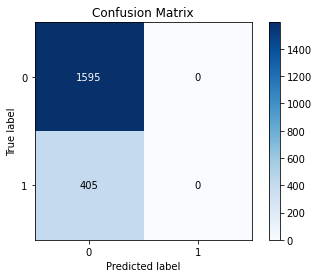

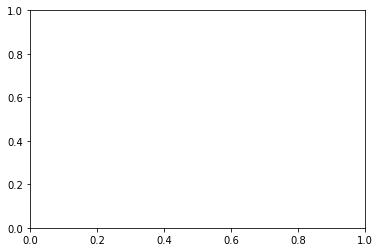

In [22]:
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plot_confusion_matrix(y_test, y_test_pred_class, ax=ax)
neptune.log_image('diagnostic_charts', fig)
 
fig, ax = plt.subplots()
# plot_roc(y_test, y_test_pred, ax=ax)
neptune.log_image('diagnostic_charts', fig)

In [23]:
neptune.stop()

In [24]:
my_project = neptune.init(api_token="ANONYMOUS",project_qualified_name="asrithabodepudi1/tester")

In [25]:
my_project.get_leaderboard(tag=['basic']).head()

,id,name,created,finished,owner,notes,running_time,size,tags,channel_accuracy,parameter_learning_rate
0,TES-1,experiment-example,2020-10-31 19:06:12.639000+00:00,2020-10-31 19:06:18.896000+00:00,asrithabodepudi1,,6,304,"[basic, finished_successfully]",0.93,0.1
1,TES-4,experiment-example,2020-11-01 13:47:39.845000+00:00,2020-11-01 13:47:46.489000+00:00,asrithabodepudi1,,6,304,"[basic, finished_successfully]",0.93,0.1
